Loading Dataset and Removing unnecessary columns


In [2]:
import pandas as pd

data = pd.read_csv('/Users/aatif/Stock_Prediction/data/Nifty 50 (2014-2024).csv')
data.head(5)

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,22 Oct 2024,24798.65,24882.0,24445.80,24472.10
1,NIFTY 50,21 Oct 2024,24956.15,24978.3,24679.60,24781.10
2,NIFTY 50,18 Oct 2024,24664.95,24886.2,24567.65,24854.05
3,NIFTY 50,17 Oct 2024,25027.40,25029.5,24728.90,24749.85
4,NIFTY 50,16 Oct 2024,25008.55,25093.4,24908.45,24971.30


In [3]:
data.shape

(2674, 6)

In [4]:
data.columns

Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [5]:
data = data.drop(columns=['Index Name'],axis=1)

In [6]:
data.head(5)

,Date,Open,High,Low,Close
0,22 Oct 2024,24798.65,24882.0,24445.80,24472.10
1,21 Oct 2024,24956.15,24978.3,24679.60,24781.10
2,18 Oct 2024,24664.95,24886.2,24567.65,24854.05
3,17 Oct 2024,25027.40,25029.5,24728.90,24749.85
4,16 Oct 2024,25008.55,25093.4,24908.45,24971.30


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.head(5)

,Date,Open,High,Low,Close
0,2024-10-22,24798.65,24882.0,24445.80,24472.10
1,2024-10-21,24956.15,24978.3,24679.60,24781.10
2,2024-10-18,24664.95,24886.2,24567.65,24854.05
3,2024-10-17,25027.40,25029.5,24728.90,24749.85
4,2024-10-16,25008.55,25093.4,24908.45,24971.30


In [9]:
data = data.reset_index()['Close']

In [10]:
data

0       24472.10
1       24781.10
2       24854.05
3       24749.85
4       24971.30
          ...   
2669     6162.25
2670     6191.45
2671     6211.15
2672     6221.15
2673     6301.65
Name: Close, Length: 2674, dtype: float64

Text(0.5, 1.0, 'Closing price of Nifty 50 from Jan 2014 - Oct 2024')

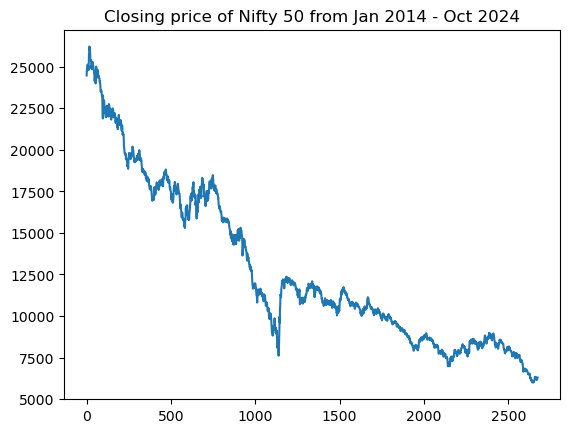

In [11]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.title("Closing price of Nifty 50 from Jan 2014 - Oct 2024")

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))


In [14]:
data

array([[0.91373054],
       [0.92901611],
       [0.93262479],
       ...,
       [0.01040062],
       [0.01089529],
       [0.01487746]])

In [15]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [16]:
train_data = data[:training_size]
test_data = data[training_size:]

In [17]:
train_data.shape,test_data.shape

((1738, 1), (936, 1))

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Conv1D,GRU

In [91]:
def create_matrix(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax),np.array(datay)

In [92]:
time_step=15
x_train,y_train = create_matrix(train_data,time_step)
x_test,y_test = create_matrix(test_data,time_step)

In [93]:
x_train.shape,y_train.shape

((1722, 15), (1722,))

In [94]:
x_test.shape,y_test.shape

((920, 15), (920,))

In [95]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [96]:
model=Sequential()
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(15,1),activation='relu')))
model.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu')))
model.add(Conv1D(filters=64,  kernel_size= 1, activation='relu'))
model.add(GRU(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [97]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=64,verbose=1)

Epoch 1/15


2024-10-22 18:45:53.186687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:45:54.411367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:45:54.465828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:45:54.560488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:45:54.681120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - ETA: 0s - loss: 0.0483

2024-10-22 18:46:13.857014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:46:14.128794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:46:14.160413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 23s 768ms/step - loss: 0.0483 - val_loss: 0.0366
Epoch 2/15
27/27 [==============================] - 20s 729ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 3/15
27/27 [==============================] - 21s 791ms/step - loss: 4.9910e-04 - val_loss: 0.0020
Epoch 4/15
27/27 [==============================] - 20s 760ms/step - loss: 3.5065e-04 - val_loss: 0.0012
Epoch 5/15
27/27 [==============================] - 20s 743ms/step - loss: 3.3158e-04 - val_loss: 0.0013
Epoch 6/15
27/27 [==============================] - 20s 739ms/step - loss: 3.0684e-04 - val_loss: 0.0011
Epoch 7/15
27/27 [==============================] - 20s 736ms/step - loss: 3.0039e-04 - val_loss: 9.9396e-04
Epoch 8/15
27/27 [==============================] - 20s 744ms/step - loss: 2.9940e-04 - val_loss: 8.7140e-04
Epoch 9/15
27/27 [==============================] - 20s 738ms/step - loss: 2.9050e-04 - val_loss: 8.9902e-04
Epoch 10/15
27/27 [==============================] - 20s 746ms

In [98]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

2024-10-22 18:51:11.329688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 2/54 [>.............................] - ETA: 2s 

2024-10-22 18:51:11.634928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-22 18:51:11.711872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 2s 53ms/step


In [99]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [100]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error
math.sqrt(mean_absolute_error(y_train,train_predict))

123.15243125709964

In [101]:
math.sqrt(mean_absolute_error(y_test,test_predict))

93.45055307488057

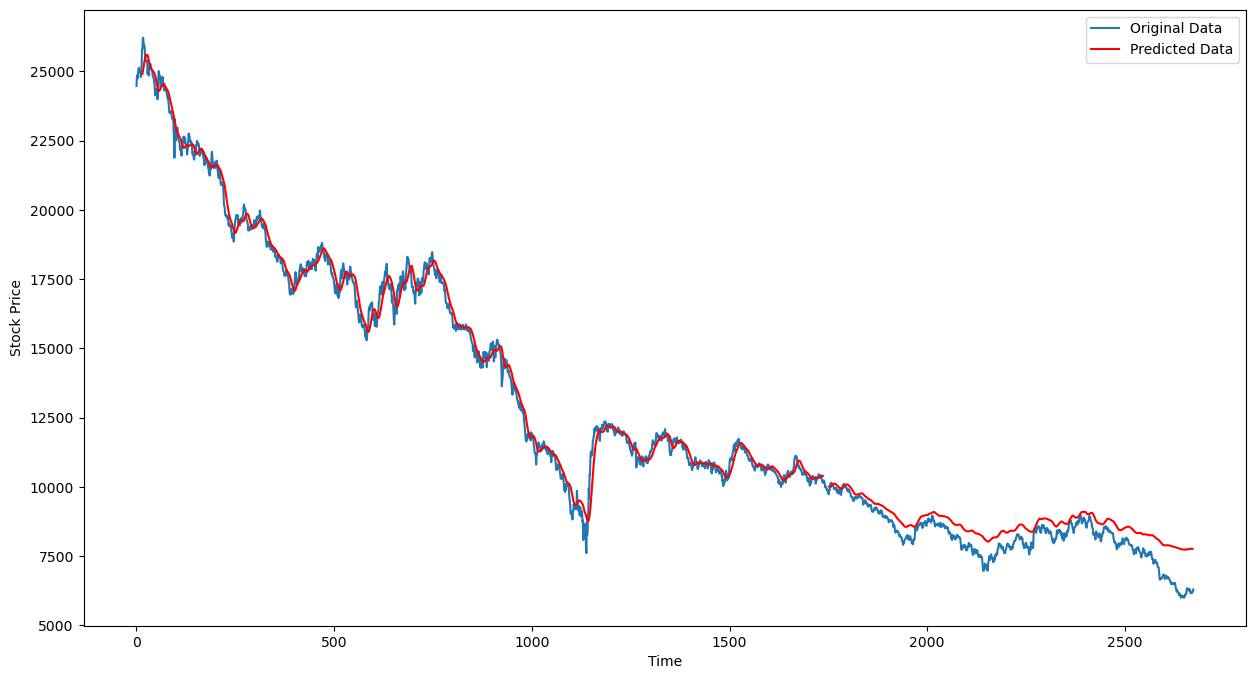

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming train_predict, test_predict, train_data, and test_data are already defined
# train_predict and test_predict are predictions after inverse_transform

# Create an empty array of the same shape as the original data for plotting predictions
predictions_plot = np.empty_like(data)
predictions_plot[:, :] = np.nan  # Fill with NaN initially

# Assign train predictions to their respective positions, considering the time step offset
train_start_index = time_step
train_end_index = train_start_index + len(train_predict)
predictions_plot[train_start_index:train_end_index, :] = train_predict

# Assign test predictions to their respective positions, considering the offset
test_start_index = train_end_index + time_step
test_end_index = test_start_index + len(test_predict)
predictions_plot[test_start_index:test_end_index, :] = test_predict

# Plotting the original data along with train and test predictions
plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(data), label='Original Data')  # Plot the original data (inverse transformed)
plt.plot(predictions_plot, label='Predicted Data', color='r')  # Plot the combined predictions (train and test)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 [==============================] - 0s 56ms/step


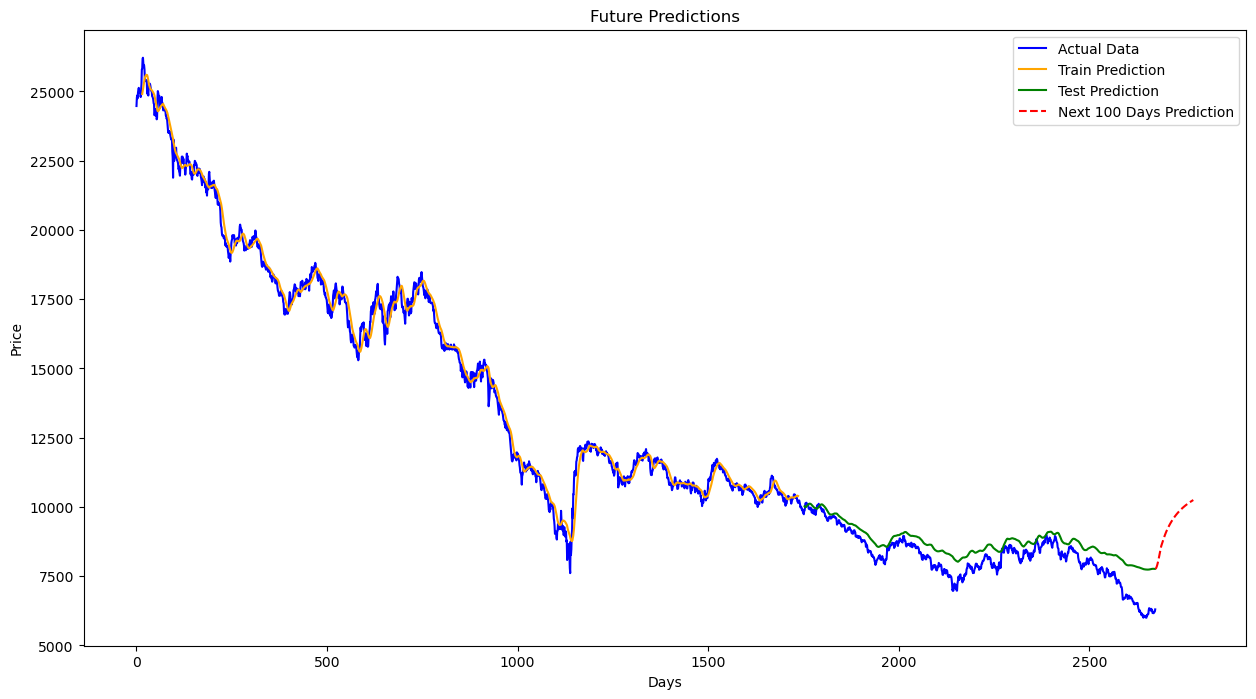

In [105]:

last_values = data[-look_back:]  # Get the last 'look_back' values from your data to start the prediction
future_predictions = []

# Predicting one day at a time for the next 30 days
for _ in range(100):
    input_data = last_values.reshape(1, look_back, 1)  # Reshape for model input (1 sample, look_back steps, 1 feature)
    next_day_prediction = model.predict(input_data)[0]  # Predict the next day
    future_predictions.append(next_day_prediction)
    
    last_values = np.append(last_values[1:], next_day_prediction)

future_predictions = np.array(future_predictions)
future_predictions = scaler.inverse_transform(future_predictions)

plt.figure(figsize=(15, 8))

plt.plot(scaler.inverse_transform(data), label='Actual Data', color='blue')

plt.plot(trainPredictPlot, label='Train Prediction', color='orange')

plt.plot(testPredictPlot, label='Test Prediction', color='green')

future_indices = np.arange(len(data), len(data) + 100)
plt.plot(future_indices, future_predictions, label='Next 100 Days Prediction', color='red', linestyle='dashed')

plt.title("Future Predictions")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()

plt.show()


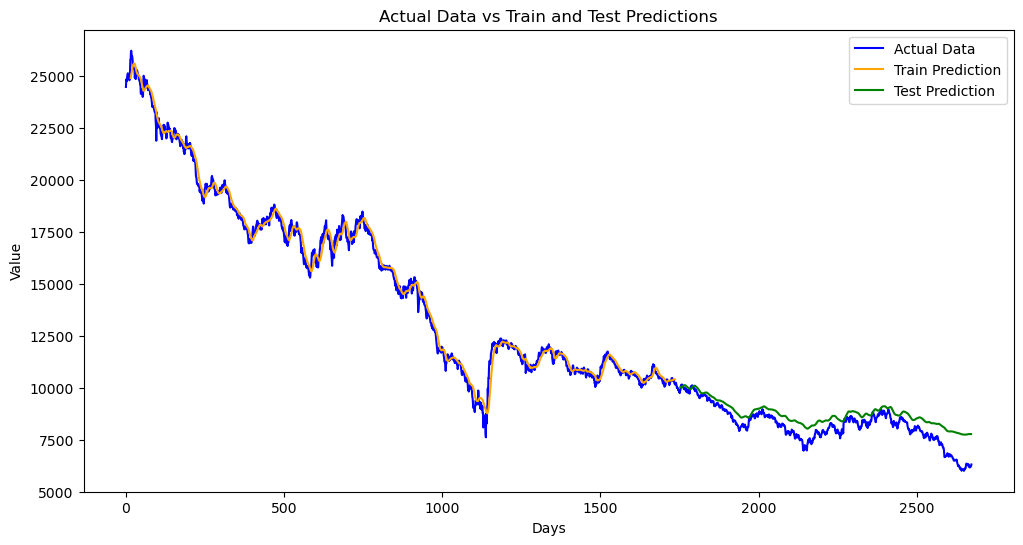

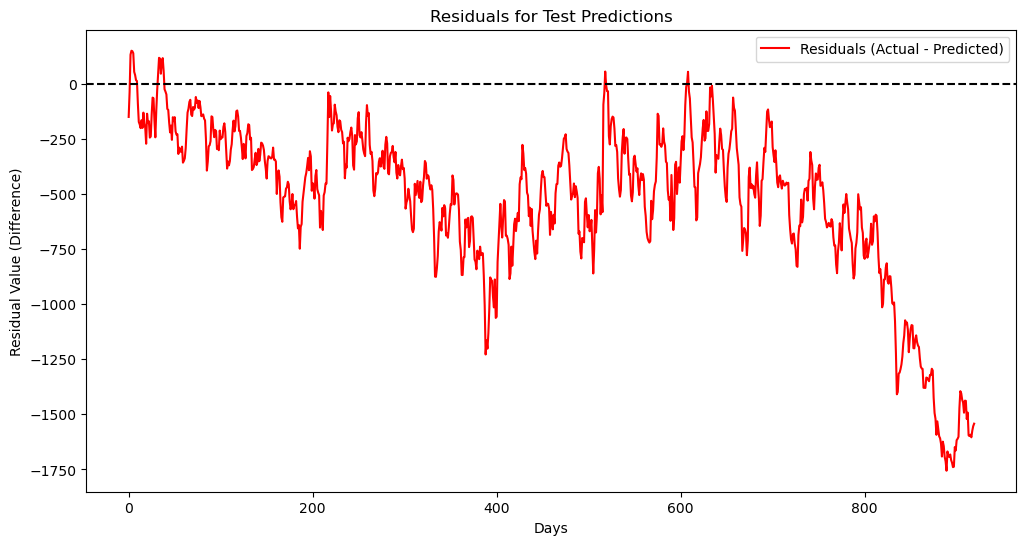

In [106]:
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
test_start_index = len(train_predict) + (look_back * 2) + 1
test_end_index = len(data) - 1
testPredictPlot[test_start_index:test_end_index, :] = test_predict

# Plot the original data, train predictions, and test predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data), label='Actual Data', color='blue')
plt.plot(trainPredictPlot, label='Train Prediction', color='orange')
plt.plot(testPredictPlot, label='Test Prediction', color='green')

plt.legend()
plt.title("Actual Data vs Train and Test Predictions")
plt.xlabel("Days")
plt.ylabel("Value")
plt.show()

# Calculate residuals for test data
# Extract the corresponding actual values for the test predictions
actual_test_data = scaler.inverse_transform(data[test_start_index:test_end_index, :])
residuals = actual_test_data - test_predict  # Residuals = Actual - Predicted

# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals (Actual - Predicted)', color='red')

plt.axhline(0, color='black', linestyle='--')  # Line at zero to see positive/negative residuals
plt.legend()
plt.title("Residuals for Test Predictions")
plt.xlabel("Days")
plt.ylabel("Residual Value (Difference)")
plt.show()